In [16]:
using Revise
using Condor
using Falcons
using NPZ
using HDF5
using PyCall
using Healpix
using PyPlot
hp = pyimport("healpy");

In [29]:
psi_dir = "/group/cmb/litebird/usr/ytakase/psi_db/3_30"
idx = 1
idx_ipix = 1
file = h5open(psi_dir * "/idx=$idx.h5", "r")
psi_in_ipix = read(file,"psi/$idx_ipix");

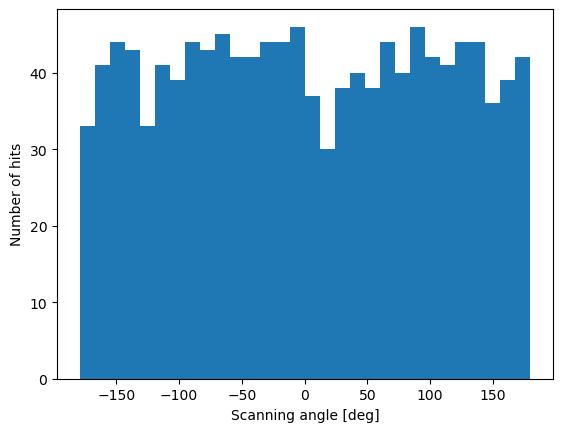

PyObject Text(24.000000000000007, 0.5, 'Number of hits')

In [21]:
plt.hist(rad2deg.(psi_in_ipix), bins=30)
plt.xlabel("Scanning angle [deg]")
plt.ylabel("Number of hits")

In [22]:
data = npzread("/home/cmb/yusuket/program/beam_study/npz_beamdata/MFT_88.5GHz_000.0_166.7_xpol_v2.npz")
Nx = 360
Ny = 721
beam2d, x, y = get_2Ddata(data, Nx, Ny);

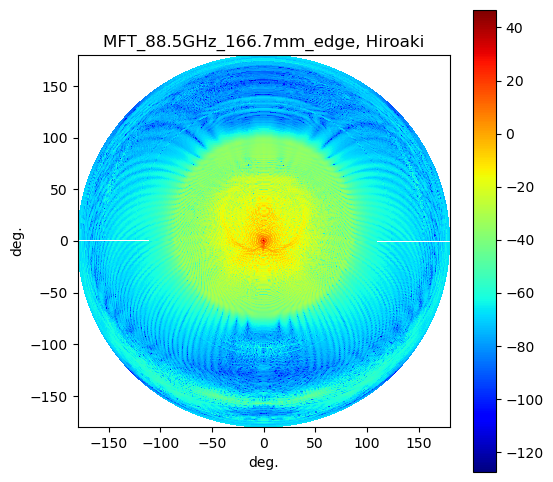

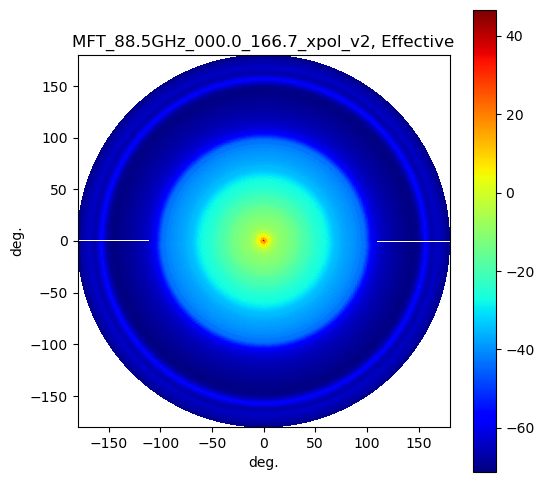

PyObject <matplotlib.colorbar.Colorbar object at 0x7fc3296fc880>

In [23]:
plt.figure(figsize=(6,6))
#plt.title("MFT_88.5GHz_000.0_166.7_xpol_v2")
plt.title("MFT_88.5GHz_166.7mm_edge, Hiroaki")
plt.xlabel("deg.")
plt.ylabel("deg.")
plt.pcolormesh(x, y, 10log10.(beam2d), cmap = "jet" )
plt.axes().set_aspect("equal")
plt.colorbar( orientation ="vertical")

effective_beam = symmetrizer(psi_in_ipix, beam2d, Nx, Ny)
plt.figure(figsize=(6,6))
plt.title("MFT_88.5GHz_000.0_166.7_xpol_v2, Effective")
plt.xlabel("deg.")
plt.ylabel("deg.")
plt.pcolormesh(x, y, 10log10.(effective_beam), cmap = "jet" )
plt.axes().set_aspect("equal")
plt.colorbar( orientation ="vertical")

In [24]:
nside = 512
npix = nside2npix(nside)
res = Resolution(nside)

Healpix resolution(NSIDE = 512)

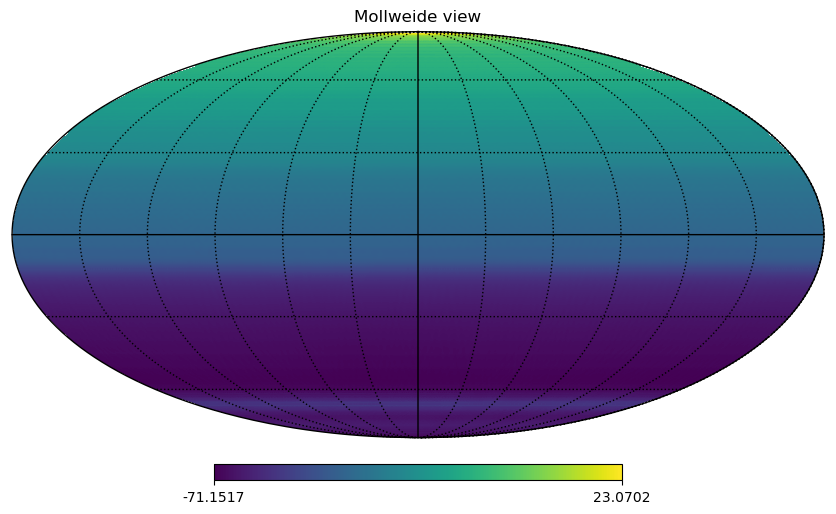

In [25]:
target_pixel = ang2pixRing(res, deg2rad(0), deg2rad(18))
beammap = gen_beammap(res, effective_beam, target_pixel)

hp.mollview(dBi(beammap), norm="none", rot=(0,0))
hp.graticule()

In [26]:
cmb_path = "/home/cmb/yusuket/program/MapData/Nside512/lensed_r0_512_non_smooth.fits"
cmbmap = hp.read_map(cmb_path, field=(0,1,2));
cmbmap = hp.ud_grade(cmbmap, nside)
lmax = 3nside - 1 
weight_path = "/home/cmb/yusuket/program/MapData/healpy-data/."
alm = hp.map2alm(cmbmap, lmax = lmax, datapath = weight_path, use_pixel_weights=true);

In [28]:
skyalm = AlmPair(alm, conj.(alm))
Blm = gen_Blm(res, beammap, weight_path);

In [33]:
convolved_map = EffectiveBeamConvolution(res, skyalm, beam2d, 1, psi_dir, weight_path)

ariaOfPixels : 2048
Run range of idx : 1 --> 1536


Progress:   0%|▏                                        |  ETA: 0:56:35

LoadError: InterruptException: